In [4]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
Notre projet portera sur le jeu League of Legends. C’est un jeu d’équipe en ligne
en 5 contre 5. Vous pouvez si vous le souhaitez regarder un tutoriel de 3 minutes
si vous avez envie de vous familiariser avec le jeu pour avoir une meilleure
compréhension globale sur le thème de notre projet.
https://www.youtube.com/watch?v=0MEOdboHk8o&ab_channel=GentleMates

# 1 - Collection de notre jeu de données

Pour collecter nos données, nous sommes directement allés les chercher à la source en se branchant à l’api du jeu. On y récupère les noms des meilleurs joueurs du serveur européen. On fait ce choix car ces parties de haut niveaux sont moins hasardeuses et il en découlera des données plus fiables.

Il faut aussi prendre en compte les restrictions de l’api concernant le nombre de requêtes, on a pour cela créé plusieurs comptes particuliers afin de faire des requêtes en parrallèles sur plus de comptes.

Nous avons séparé tout le processus de requêtes api dans le fichier api_process. Ce fichier contiendra le code en rapport direct avec les jalons et le rendu final du projet.

# Update depuis le jalon 2 : 
Même si nous en avions l'intuition, prédire l'issue d'une partie en prenant ses caractéristiques à l'instant final de la partie était trop simple (environ 1 d'accuracy dès la régression logistique en cross validation).

On revoit donc tout le dataset pour prendre des informations à un instant t (exemple ici : 15 minutes) de la partie pour en prédire son issue. On aura donc des résultats plus pertinents avec une vraie utilité avec un peu plus de challenge.

Le processus de récolte de données, de filtrage des parties de moins de 15 minutes etc.. est disponible dans le notebook api_processs. 

On a gardé une trace de nos anciennes accuracys dans le fichier accuracy_with_single_feature.txt.



In [4]:
matchs_info_df = pd.read_csv('data_15min_final.csv') #import of dataset created by api_process.ipynb


False


In [7]:
np.any(matchs_info_df.isna())


False

In [3]:
matchs_info_df

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,1,0,177,352,0,0,628,817,0,0,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,1,0,185,446,0,0,551,618,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,1,0,186,466,0,0,603,826,0,0,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,0,195,307,0,0,746,945,0,0,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,1,0,230,348,0,30,759,635,0,0,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1,0,334,307,0,0,867,512,0,0,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,1,0,225,362,0,0,664,692,0,0,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,0,456,380,0,0,817,818,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,1,0,188,393,0,0,651,798,0,0,...,50,88,47,325,40,15059,48839,452886,28472,30051


# Visualisation du dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [9]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']

In [10]:
target

0       1
1       1
2       1
3       0
4       1
       ..
9813    1
9814    1
9815    0
9816    1
9817    0
Name: winningTeam, Length: 9818, dtype: int64

In [12]:
data_to_display = data[data.columns[:len(data.columns)//2]] #For histogram display, we dont want to display red team stats because we suppose that they are in the same range as blue team stats
data_sample = data.sample(2000) #Sample 2000 rows to work with for scatter plot
data_to_display

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team1.damageStats.trueDamageTaken,Team1.goldPerSecond,Team1.jungleMinionsKilled,Team1.level,Team1.minionsKilled,Team1.participantId,Team1.position.x,Team1.position.y,Team1.timeEnemySpentControlled,Team1.totalGold
0,1,0,177,352,0,0,628,817,0,0,...,152,50,107,50,425,15,54459,18759,441764,27130
1,1,0,185,446,0,0,551,618,0,0,...,1419,50,86,45,344,15,23850,36382,1151250,24094
2,1,0,186,466,0,0,603,826,0,0,...,918,50,66,44,324,15,58117,13286,638738,26168
3,0,0,195,307,0,0,746,945,0,0,...,1484,50,104,47,386,15,30790,24223,574770,28537
4,1,0,230,348,0,30,759,635,0,0,...,764,50,95,47,392,15,43556,28191,642631,28091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,1,0,334,307,0,0,867,512,0,0,...,392,50,124,47,420,15,33904,26626,350953,28695
9814,1,0,225,362,0,0,664,692,0,0,...,629,50,103,46,416,15,31611,42397,843557,28729
9815,0,0,456,380,0,0,817,818,0,0,...,816,50,120,51,350,15,40994,43493,1393014,37768
9816,1,0,188,393,0,0,651,798,0,0,...,2738,50,86,47,367,15,21744,36784,804861,29872


# Histogrammes 

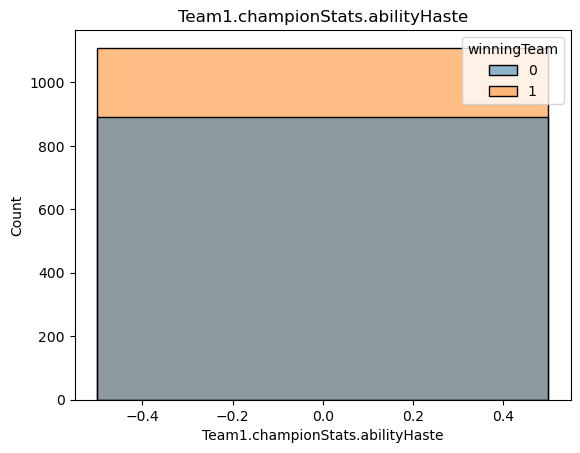

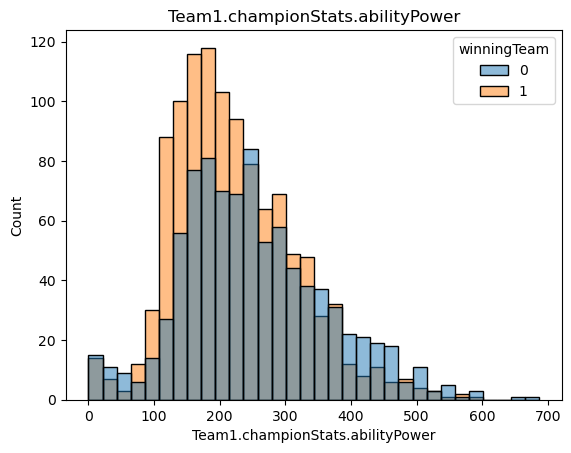

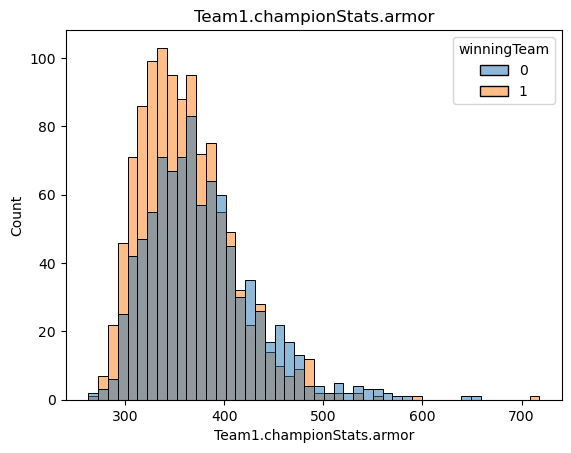

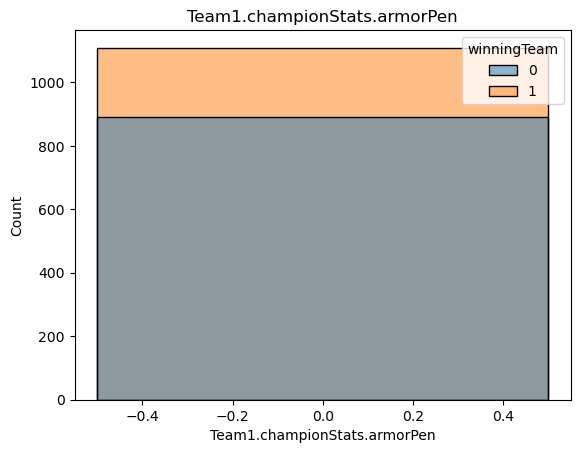

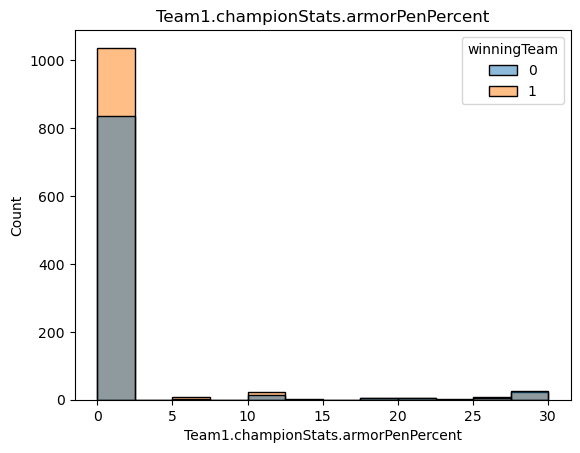

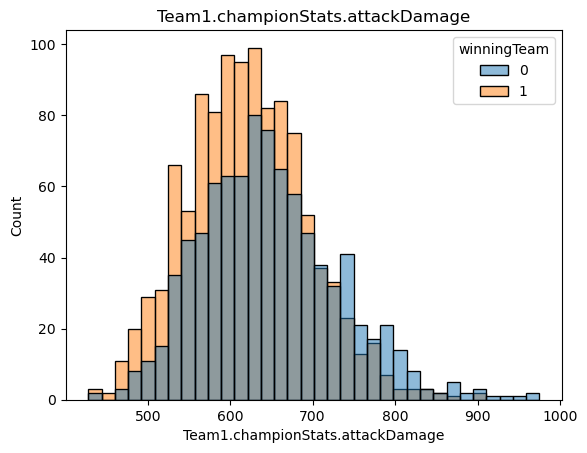

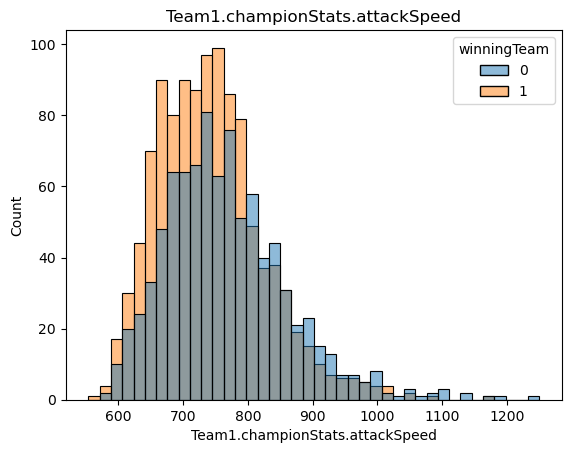

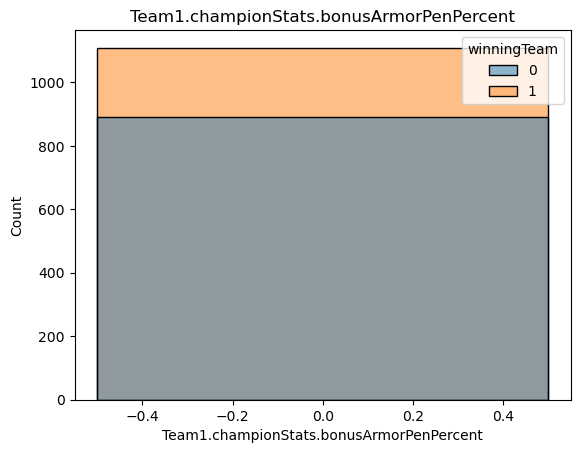

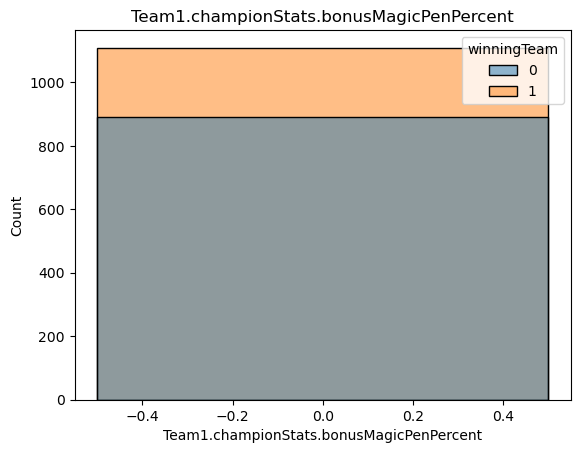

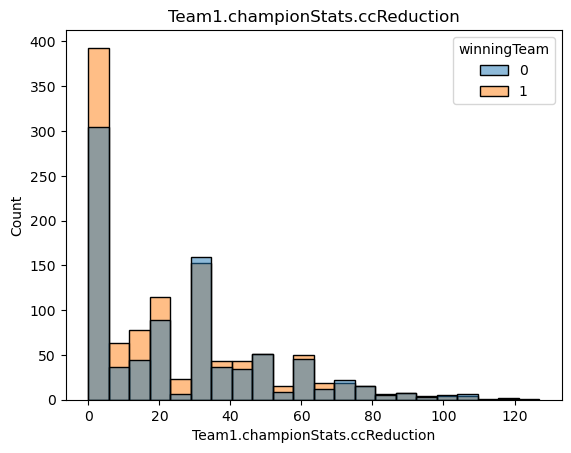

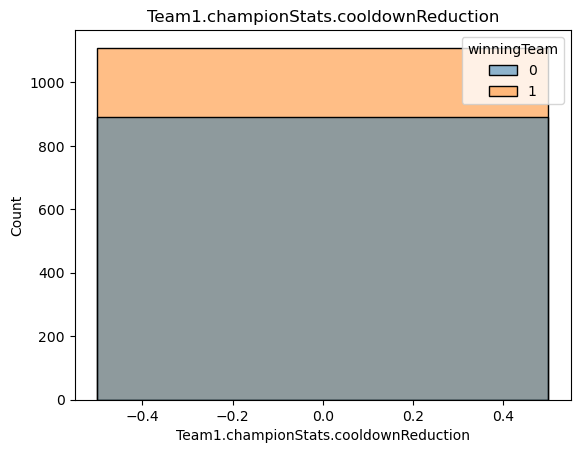

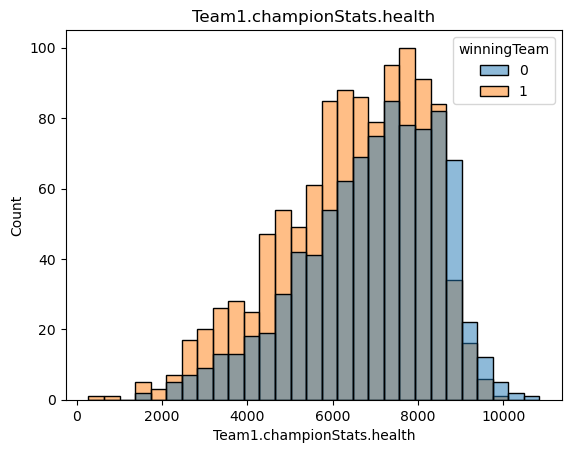

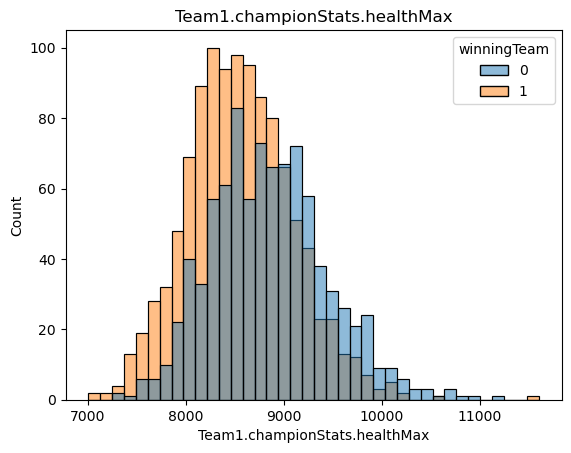

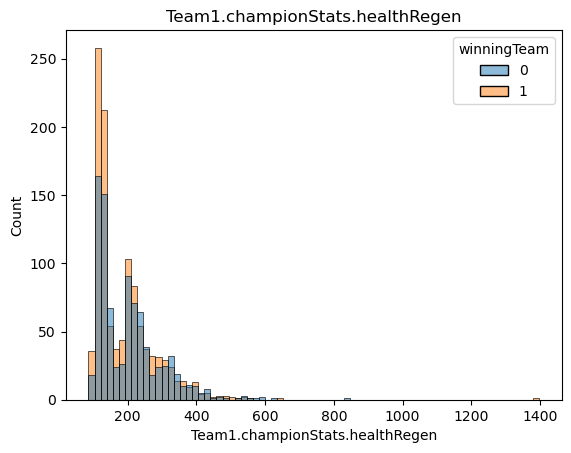

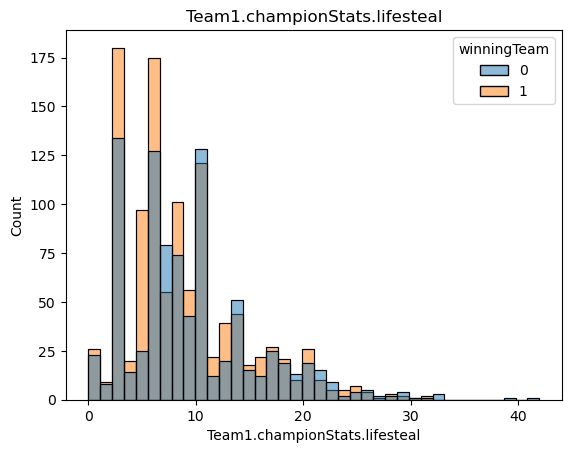

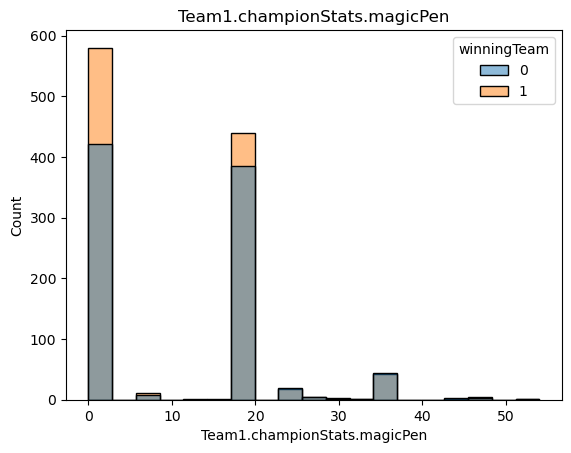

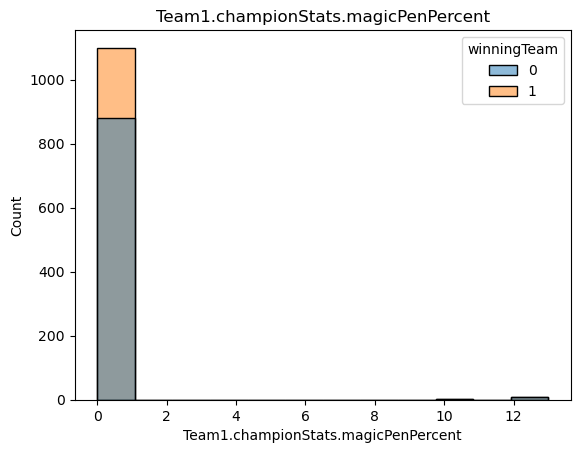

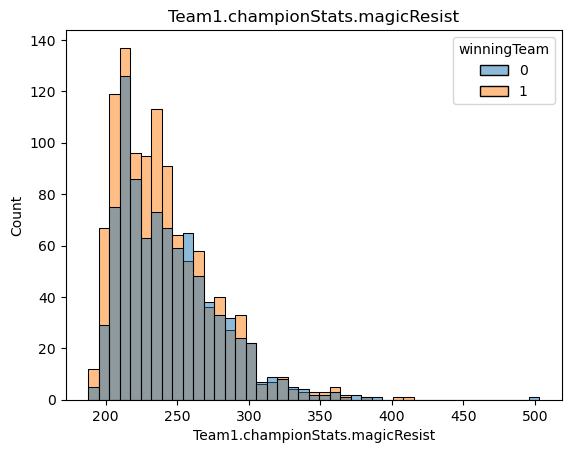

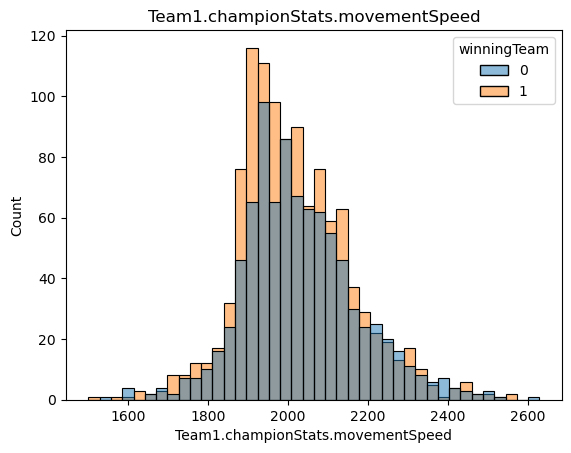

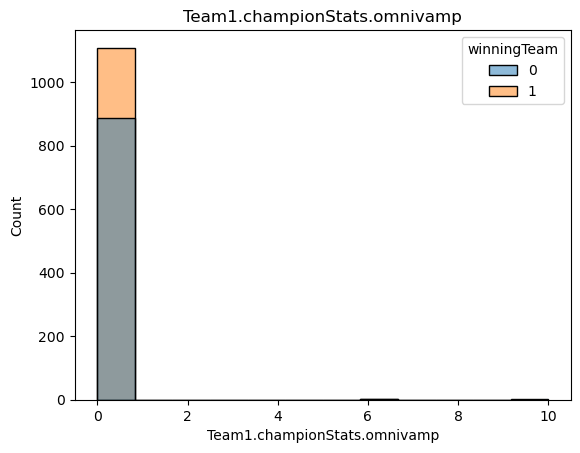

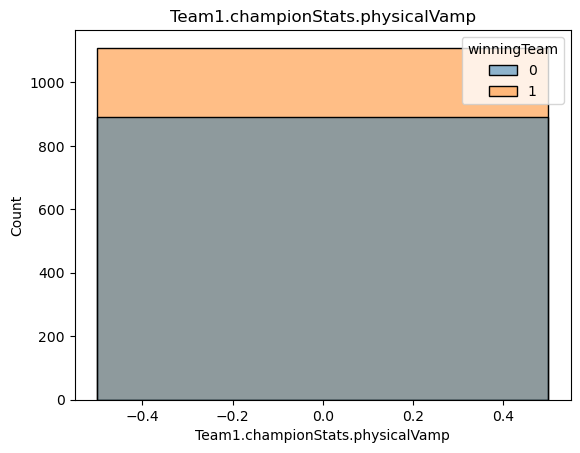

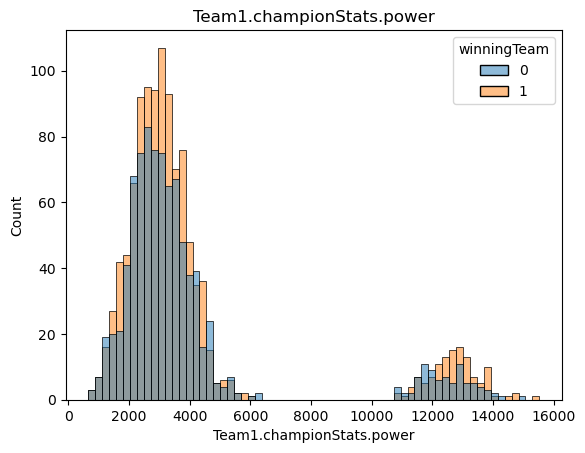

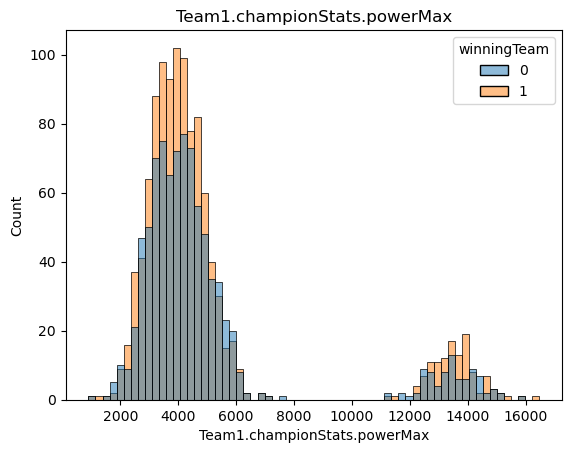

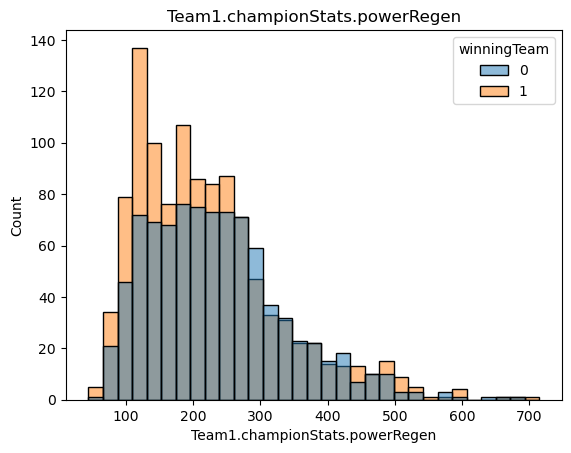

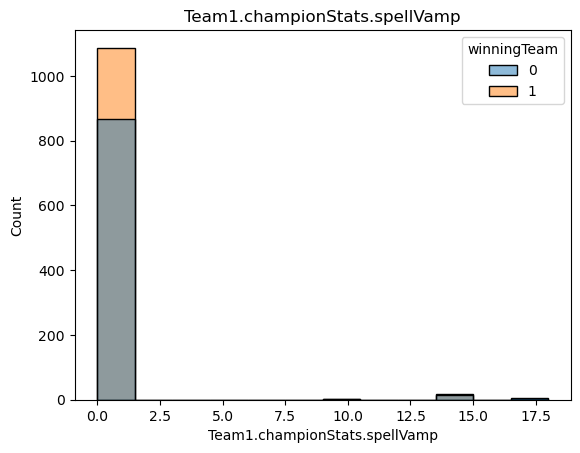

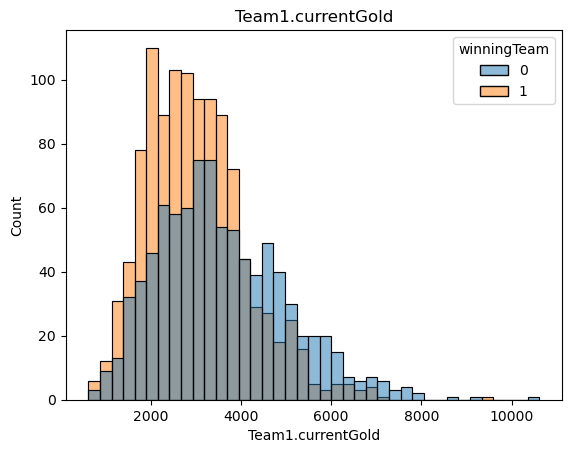

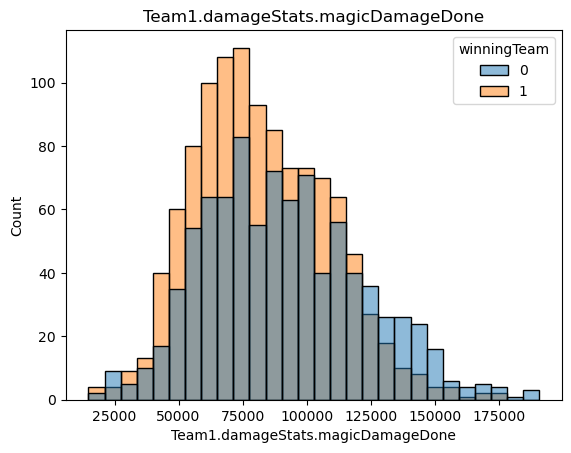

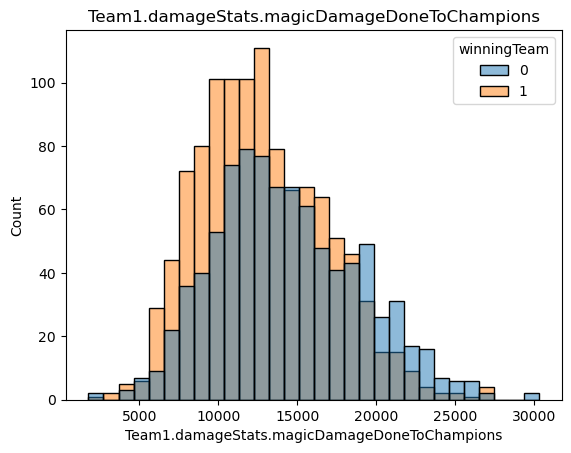

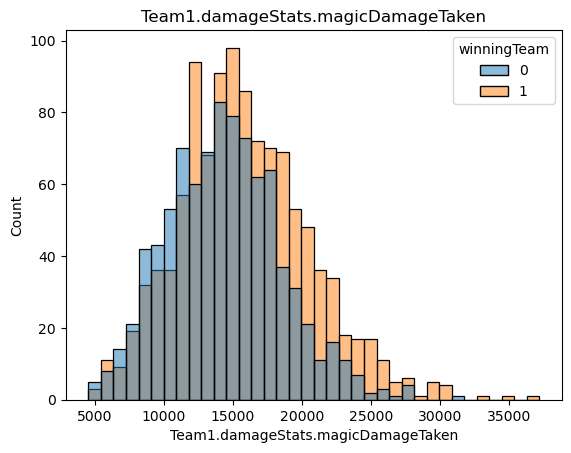

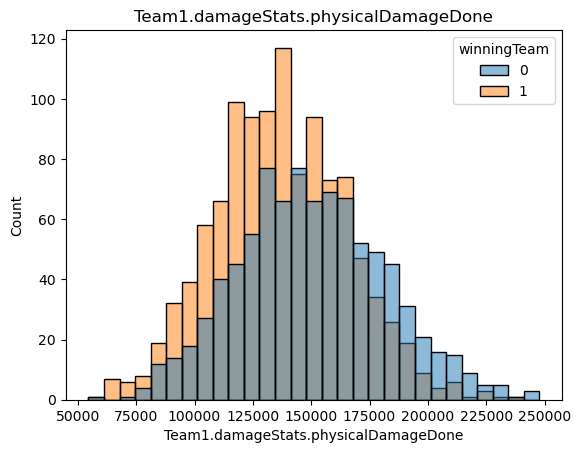

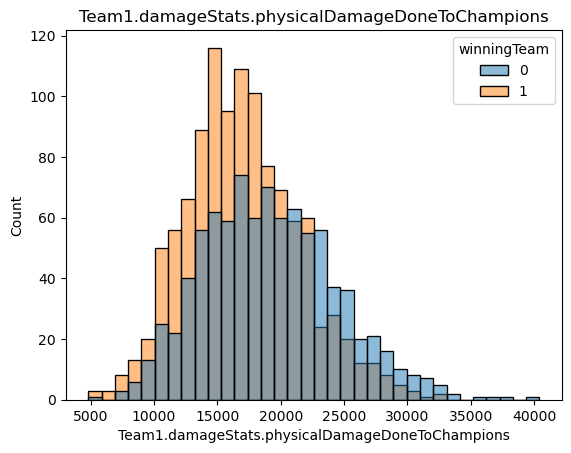

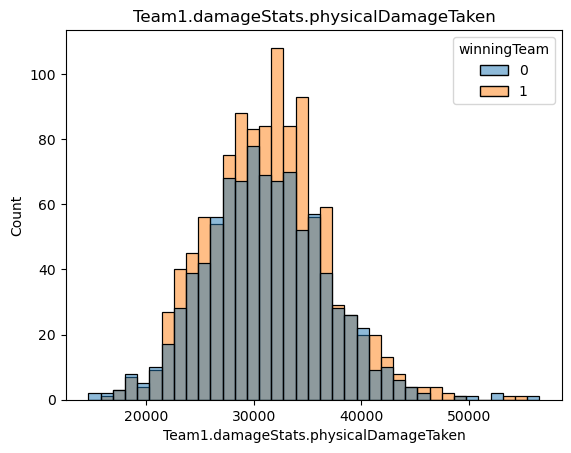

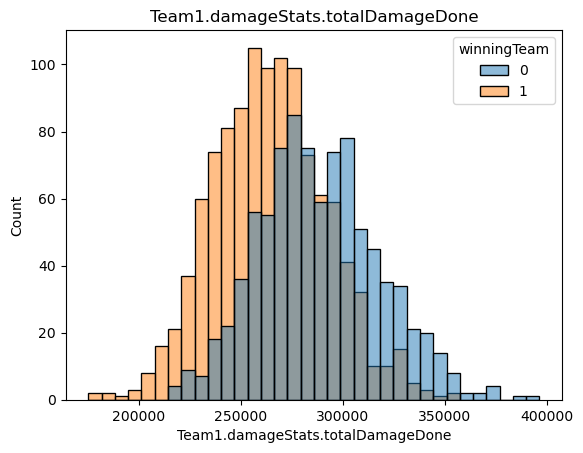

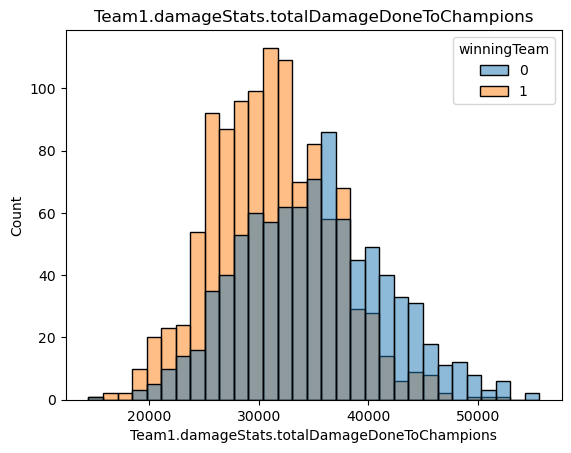

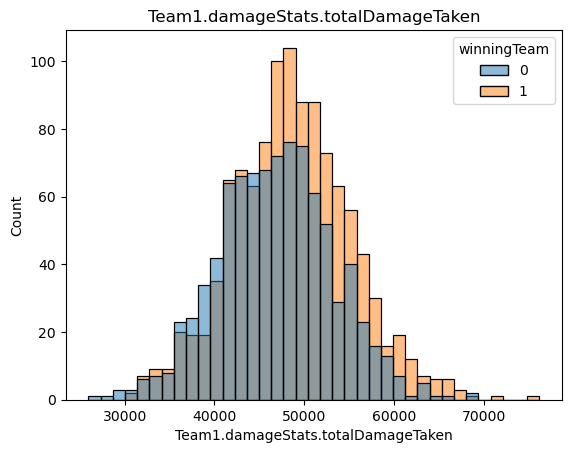

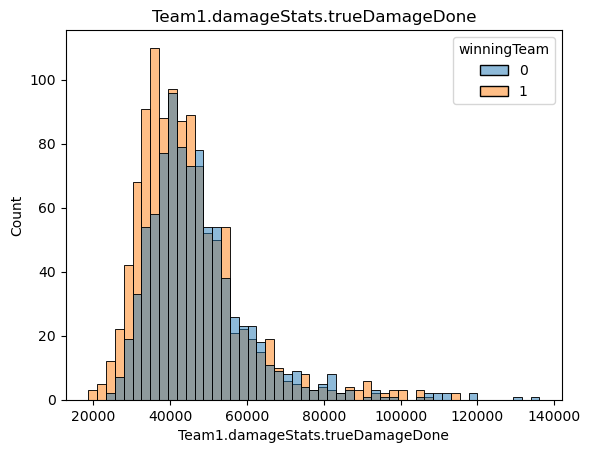

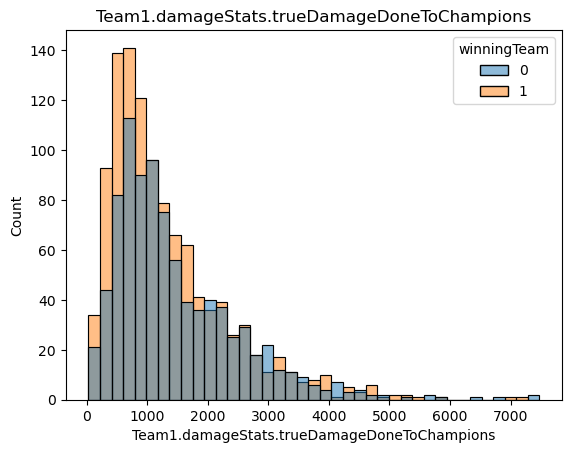

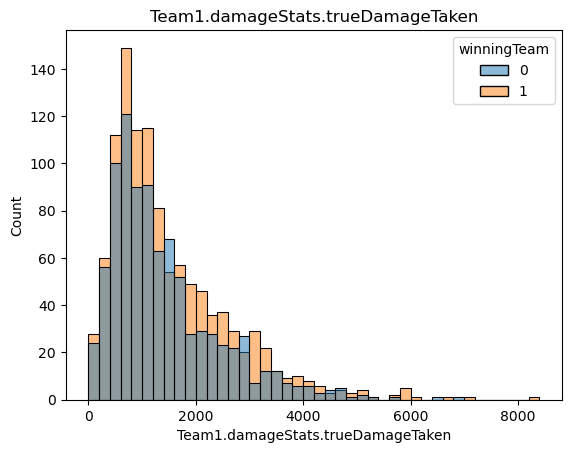

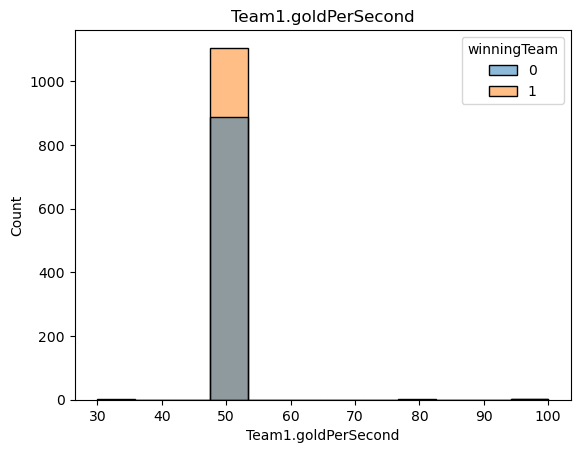

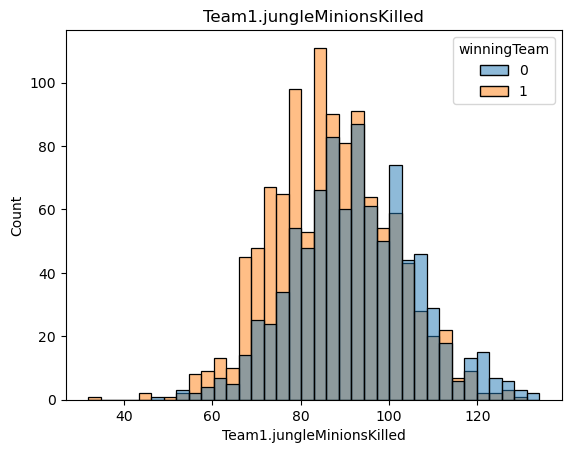

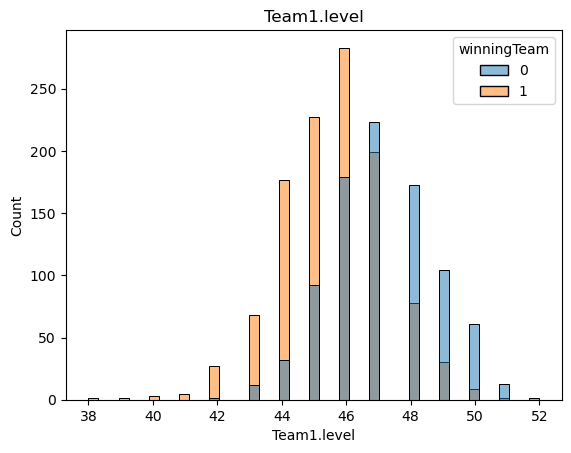

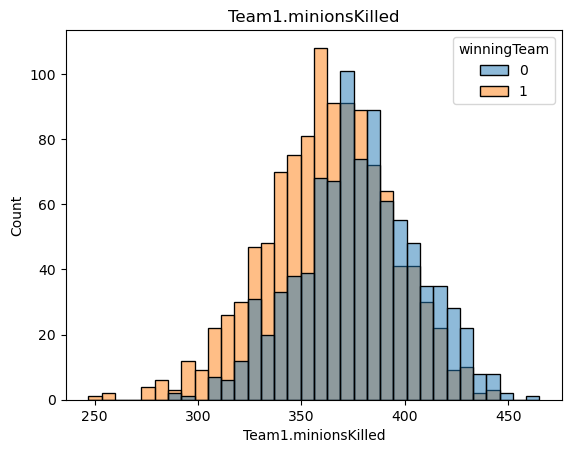

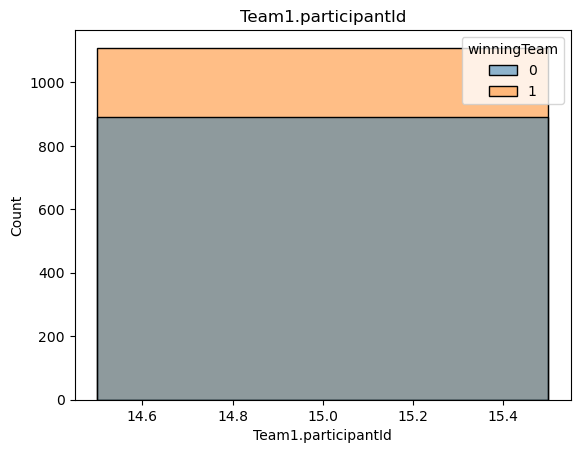

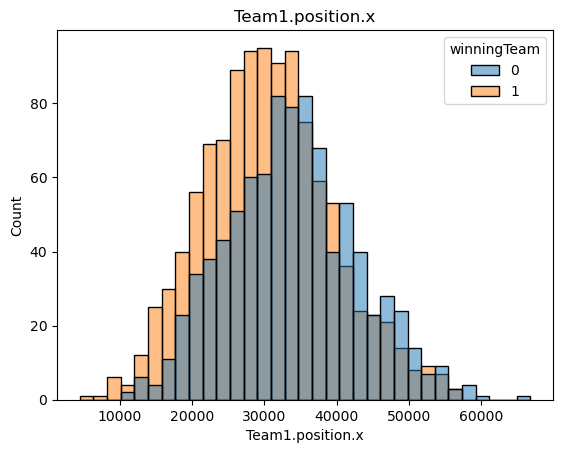

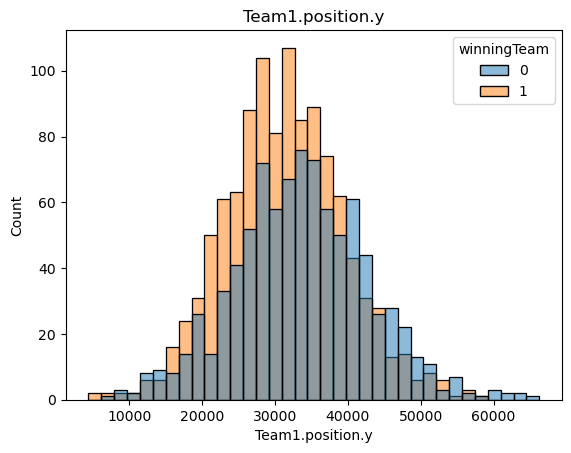

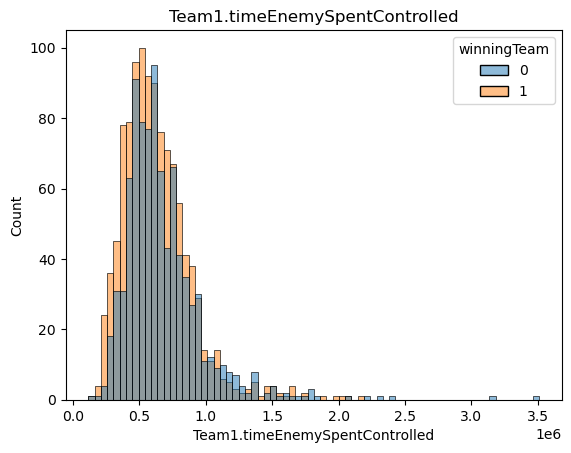

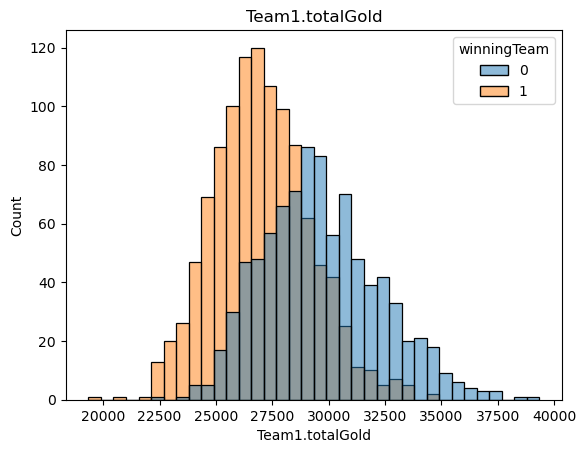

In [15]:
#We take the first half of the dataset to display variables distribution with seaborn
#display the distribution of the variables

plt.figsize=(20,20)
for col in data_to_display.columns[1:]: #We display from column 1 to 10
    sns.histplot(data_sample, x=col, hue=target)
    plt.title(col)
    plt.show()

On observe que certaines stats ne servent à rien pour prédire une partie car elles sont constantes

In [ ]:
useless_columns = ['Team0.

In [45]:
data_to_display.describe()

,winningTeam,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,...,Team1.damageStats.trueDamageTaken,Team1.goldPerSecond,Team1.jungleMinionsKilled,Team1.level,Team1.minionsKilled,Team1.participantId,Team1.position.x,Team1.position.y,Team1.timeEnemySpentControlled,Team1.totalGold
count,9818.000000,9818.0,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9818.000000,9818.0,9818.0,...,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.0,9818.000000,9818.000000,9.818000e+03,9818.000000
mean,0.553982,0.0,235.988389,367.605419,0.0,1.377776,633.077205,750.664799,0.0,0.0,...,1436.848951,50.133428,89.129151,46.261764,369.117743,15.0,32020.144530,32236.152577,6.547070e+05,28167.073437
std,0.497103,0.0,102.364094,51.235050,0.0,5.749763,80.809331,85.775827,0.0,0.0,...,1075.316464,2.729255,14.196335,1.814491,30.717858,0.0,9027.114545,8659.231026,2.853515e+05,2725.174110
min,0.000000,0.0,0.000000,263.000000,0.0,0.000000,410.000000,512.000000,0.0,0.0,...,0.000000,0.000000,1.000000,36.000000,238.000000,15.0,4415.000000,4377.000000,8.391000e+04,19160.000000
25%,0.000000,0.0,161.000000,331.000000,0.0,0.000000,575.000000,690.000000,0.0,0.0,...,676.000000,50.000000,80.000000,45.000000,349.000000,15.0,25814.500000,26461.000000,4.712805e+05,26252.000000
50%,1.000000,0.0,222.000000,360.000000,0.0,0.000000,628.000000,740.000000,0.0,0.0,...,1128.000000,50.000000,89.000000,46.000000,370.000000,15.0,31700.000000,32008.000000,6.076975e+05,27953.500000
75%,1.000000,0.0,299.000000,395.000000,0.0,0.000000,683.000000,799.000000,0.0,0.0,...,1923.000000,50.000000,98.000000,47.000000,390.000000,15.0,37750.750000,37707.750000,7.721850e+05,29855.000000
max,1.000000,0.0,776.000000,726.000000,0.0,48.000000,1092.000000,1283.000000,0.0,0.0,...,8580.000000,100.000000,144.000000,53.000000,465.000000,15.0,68879.000000,66289.000000,3.572988e+06,41031.000000


In [46]:
def plot_custom_graph(title, data_sample, col , xlabel, ylabel):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.scatter(data_sample["Team1."+col], data_sample["Team2."+col], c=data_sample["winningTeam"], cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(['Blue team wins', 'Red team wins']) 
    plt.show()


# Graphs

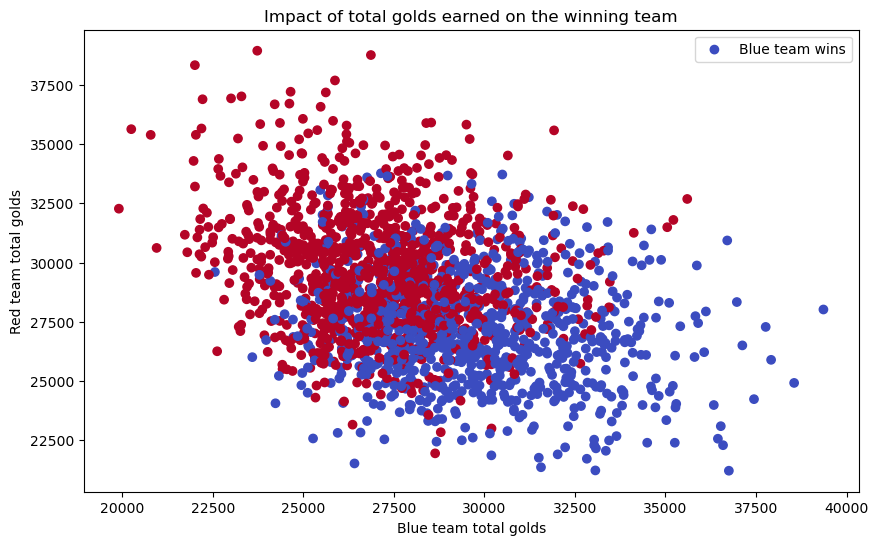

In [47]:
#Impact of total golds earned on the winning team
plot_custom_graph('Impact of total golds earned on the winning team', data_sample, 'totalGold', 'Blue team total golds', 'Red team total golds')

League of legends is game heavily influenced by golds as this graph shows.

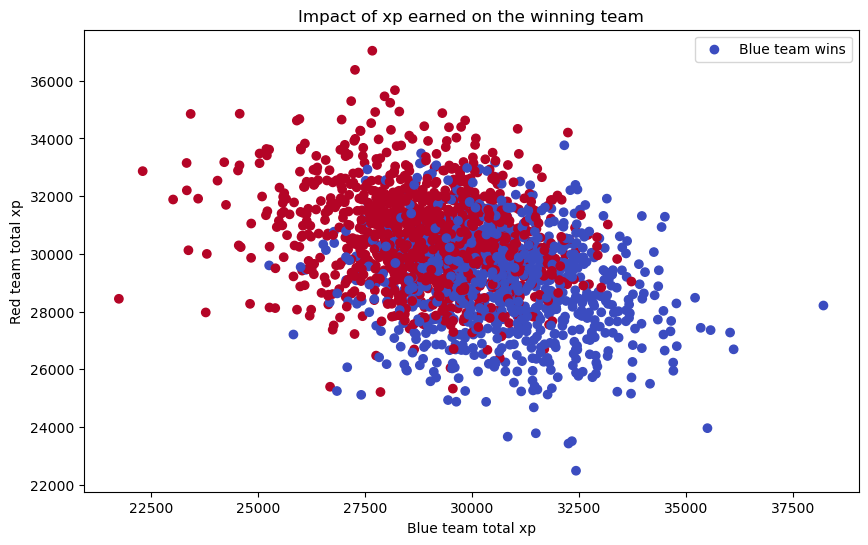

In [48]:
#Impact of total xp earned on the winning team
plot_custom_graph('Impact of xp earned on the winning team', data_sample, 'xp', 'Blue team total xp', 'Red team total xp')

It seems that the experience points earned is important 

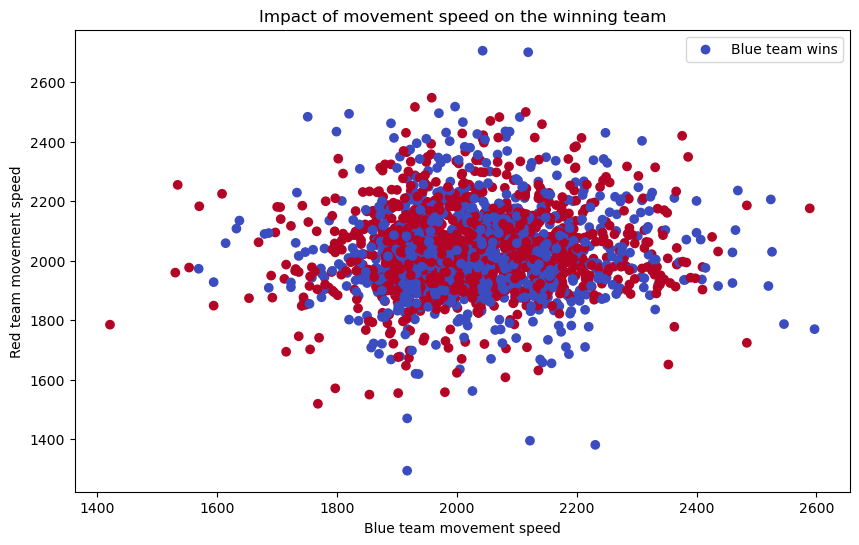

In [49]:
plot_custom_graph('Impact of movement speed on the winning team', data_sample, 'championStats.movementSpeed', 'Blue team movement speed', 'Red team movement speed')

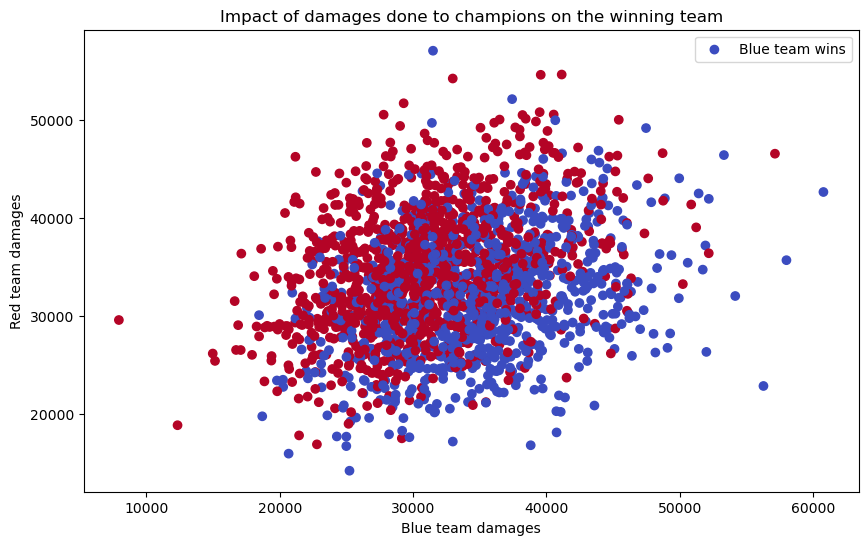

In [50]:
plot_custom_graph('Impact of damages done to champions on the winning team', data_sample, 'damageStats.totalDamageDoneToChampions', 'Blue team damages', 'Red team damages')

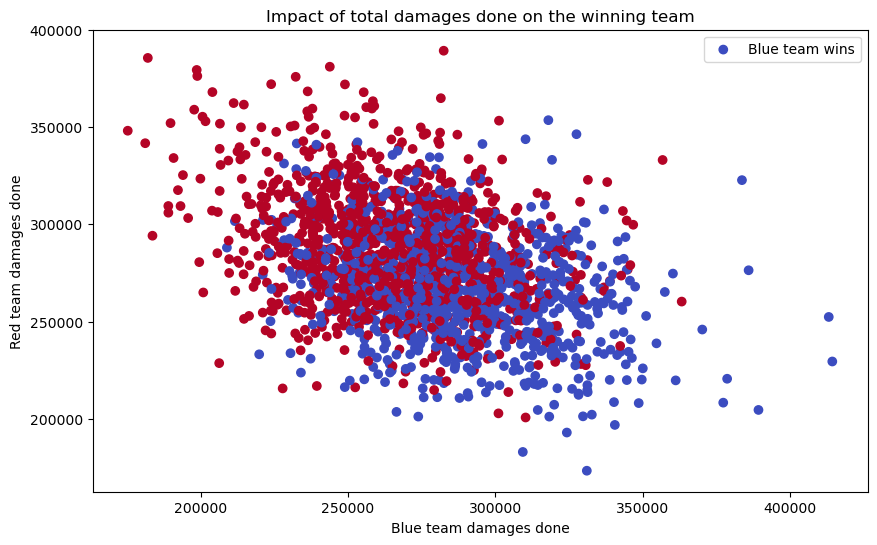

In [51]:
plot_custom_graph('Impact of total damages done on the winning team', data_sample, 'damageStats.totalDamageDone', 'Blue team damages done', 'Red team damages done')

# Jalon 2

Nous voulons faire une régression logistique pénalisée.

Ce choix se justifie car nous cherchons à prédire une variable qualitative binaire.

Pour les hyperparamètres, nous allons utiliser une gridSearchCV pour selectionner les meilleurs hyperparamètres.

Ceux-ci sont:

    -la pénalité

    -l'inverse de la force de régularisation, C

    -le nombre d'itérations maximal

    -le ratio entre l1 et l2 pour l'elasticNet

Nous n'utilisons pas un randomSearch pour les hyperparamètres car il n'y a pas tant de valeurs à tester.

Pour ajuster nos hyperparamètres, nous utilisons plusieurs cross-validations:

    -Une, en interne, pour la sélection des hyperparamètres

    -Une, en externe, pour l'évaluation de la généralisation de notre modèle

On compare donc par cross-validation la geénéralisation de plusieurs hyperparamètres, eux-meme sélectionnés par cross-validation.

Pour cela, on a séparé nos données plusieurs fois en train, validation et test set.

In [2]:
data = pd.read_csv('data_15min_final.csv')
target = data['winningTeam']
data.drop(columns='winningTeam', inplace=True)

In [3]:
data

,Team1.championStats.abilityHaste,Team1.championStats.abilityPower,Team1.championStats.armor,Team1.championStats.armorPen,Team1.championStats.armorPenPercent,Team1.championStats.attackDamage,Team1.championStats.attackSpeed,Team1.championStats.bonusArmorPenPercent,Team1.championStats.bonusMagicPenPercent,Team1.championStats.ccReduction,...,Team2.goldPerSecond,Team2.jungleMinionsKilled,Team2.level,Team2.minionsKilled,Team2.participantId,Team2.position.x,Team2.position.y,Team2.timeEnemySpentControlled,Team2.totalGold,Team2.xp
0,0,177,352,0,0,628,817,0,0,71,...,50,100,47,421,40,58227,25880,1049805,24603,29860
1,0,185,446,0,0,551,618,0,0,0,...,50,95,46,402,40,44645,41057,395210,27729,30281
2,0,186,466,0,0,603,826,0,0,30,...,50,104,49,389,40,39313,27933,730043,31166,31966
3,0,195,307,0,0,746,945,0,0,30,...,50,107,48,385,40,43743,50106,957390,30368,32863
4,0,230,348,0,30,759,635,0,0,67,...,50,83,46,370,40,49966,24051,725235,28765,29713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,0,334,307,0,0,867,512,0,0,19,...,50,90,46,369,40,50322,38622,850247,25296,29973
9814,0,225,362,0,0,664,692,0,0,18,...,50,101,47,366,40,42486,54985,568203,29257,30016
9815,0,456,380,0,0,817,818,0,0,0,...,50,76,42,352,40,58954,56762,152030,27287,25950
9816,0,188,393,0,0,651,798,0,0,10,...,50,88,47,325,40,15059,48839,452886,28472,30051


In [4]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42) #70% training, 30% testing

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pip = make_pipeline(StandardScaler(), LogisticRegression()) #Create a pipeline with a standard scaler and a logistic regression

# Définition des paramètres à rechercher
parameters = {'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'], #l1 pour Lasso, l2 pour Ridge
              'logisticregression__l1_ratio': [0.1, 0.5, 0.9],  #Ratio de mélange de la régularisation (0 = l2, 1 = l1)
              'logisticregression__C': [0.1, 1, 10, 100, 1000], #Inverse de la force de régularisation
              'logisticregression__max_iter' : [10, 100, 1000, 2500, 5000]}  #Nombre d'itérations maximales

grid_search = GridSearchCV(pip, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)



In [59]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate( #Cross validation
    grid_search, data, target, cv=5, n_jobs=-1, return_estimator=True
)

In [61]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]): #Display the best hyperparameters for each fold
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #2:
{'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #3:
{'logisticregression__C': 10, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #4:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}
Best hyperparameters for fold #5:
{'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.1, 'logisticregression__max_iter': 10, 'logisticregression__penalty': 'l2'}


On voit que le meilleur choix de pénalité est la pénalité Lasso (l2).

Aussi, on sélectionne des valeurs basses pour C et le nombre max d'itérations.

On peut ignorer l1_ratio car la pénalité elasticNet n'est pas la meilleure.

# Performances sur le jeu de données test

In [64]:
cv_results = pd.DataFrame(cv_results)
print(cv_results[["fit_time", "score_time", "test_score"]])


     fit_time  score_time  test_score
0  322.425234    0.018946    0.760183
1  324.393318    0.015957    0.759674
2  326.270183    0.008487    0.752546
3  318.741579    0.033061    0.769231
4  316.547396    0.055680    0.771268


In [66]:

cv_test_scores = cv_results["test_score"]
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.763 ± 0.008


On voit avec notre modèle généralise bien car la variance est faible.


# Conclusion jalon 2

On conclut donc de cela qu'avec une régression logistique un peu tunée on arrive à prédire l'issue de ~ 77,2% des parties en ayant les informations à 15 minutes de jeu. 

# Jalon 3) Forêts aléatoires

In [1]:
import requests
import json
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On veut donc ici déterminer les meilleurs paramètres de max_features et de n_estimators pour notre foret aléatoire

On va pour cela créer une matrice de la taille de nos deux paramètres ce qui permettra de bien visualiser par la suite et de garder les erreurs oob correspondantes 

In [5]:
n_estimators = [10, 100, 500, 1000, 2500, 5000]
max_features = np.arange(0.1, 1.1, 0.1) #en pourcentage pour vraiment tout tester

In [6]:
max_features

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [22]:
oob_accuracys = np.zeros((len(n_estimators), len(max_features)))

In [24]:

oob_accuracys

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_accuracy = []
for elt in n_estimators:
    rf = RandomForestClassifier(n_estimators=elt, oob_score=True, n_jobs=-1)
    rf.fit(x_train, y_train)
    n_estimators_accuracy.append(rf.oob_score_)

c:\Users\Emilio\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


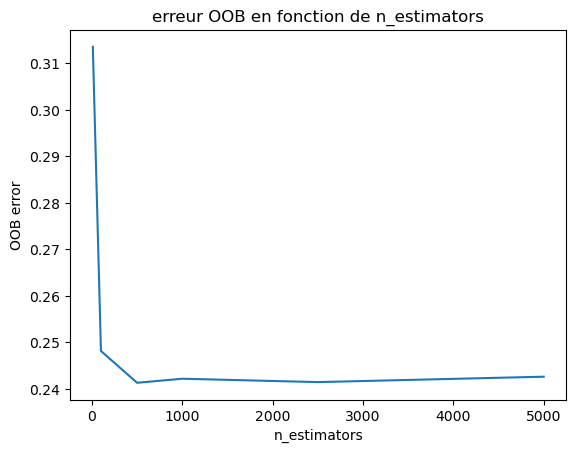

In [30]:
#graphique 
errors = [1 - x for x in n_estimators_accuracy]
plt.plot(n_estimators, errors)
plt.xlabel('n_estimators')
plt.ylabel('OOB error')
plt.title('erreur OOB en fonction de n_estimators')
plt.show()

On observe bien que la zone qui nous intéresse est aux alentours de 500 et qu'il y a ensuite un plateau. On reserre donc entre 0 et 1000 par pas de 50 pour zoomer sur cette partie intéressante

In [44]:
n_estimators = np.arange(100, 1000, 100)
n_estimators_accuracy = []
for elt in n_estimators:
    rf = RandomForestClassifier(n_estimators=elt, oob_score=True, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    n_estimators_accuracy.append(rf.oob_score_)

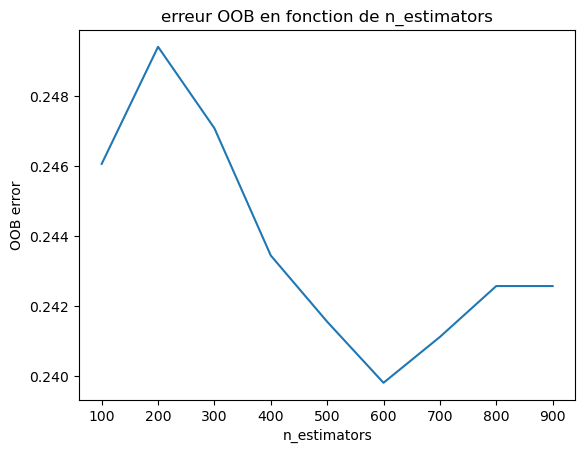

In [45]:
#graphique 
errors = [1 - x for x in n_estimators_accuracy]
plt.plot(n_estimators, errors)
plt.xlabel('n_estimators')
plt.ylabel('OOB error')
plt.title('erreur OOB en fonction de n_estimators')
plt.show()

En regardant l'échelle des ordonnées on se rend compte que la différence est assez négligeable, on parle de millième de différence sur l'accuracy. On considèrera quand même qu'une valeur autour de 500 ou 600 sera idéale.

On a bien une matrice de zeros avec toutes les possibilitées de combinaisons entre les paramètres, on resserera les n_estimators si besoin

In [46]:
max_features_accuracy = []
for elt in max_features:
    rf = RandomForestClassifier(n_estimators=550, max_features=elt, oob_score=True, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    max_features_accuracy.append(rf.oob_score_)

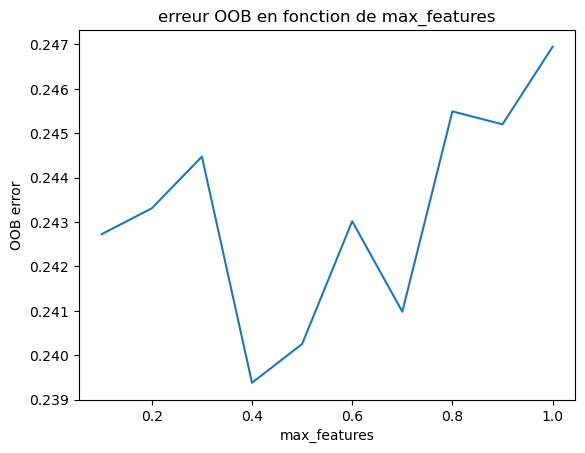

In [47]:
#graphique
errors = [1 - x for x in max_features_accuracy]
plt.plot(max_features, errors)
plt.xlabel('max_features')
plt.ylabel('OOB error')
plt.title('erreur OOB en fonction de max_features')
plt.show()

On aurait donc un maximum d'accuracy avec n_estimators=550 et max_features=40%

In [48]:
rf = RandomForestClassifier(n_estimators=550, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7586558044806517

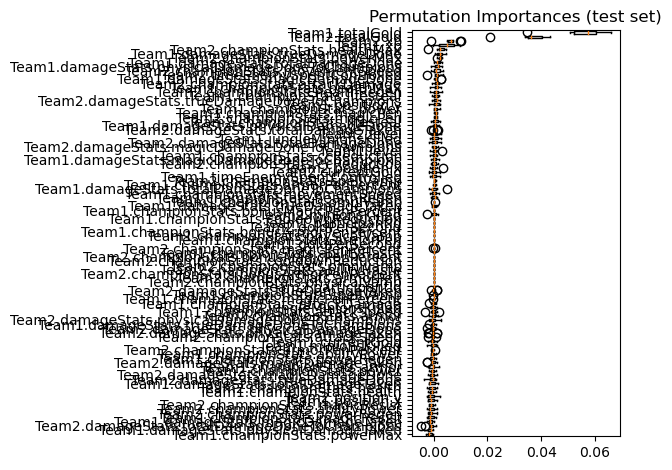

In [49]:
#MDA (Mean Decrease Accuracy) : Importance des variables
#On va regarder les 26 variables les plus importantes 
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()
